# Mini Run through with a few posts

see if this works

In [3]:
# Cell 1 - Imports
import json
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup  # Added for HTML cleaning

In [9]:
# Cell 2 - Import data
posts = []
files = ['../data/1.json', '../data/2.json']

for file in files:
    with open(file, 'r', encoding='utf-8') as f:
        thread = json.load(f)
        
        # Discussion-level features (shared across all posts in thread)
        discussion_features = {
            'post_discussion_id': thread.get('id'),
            'post_discussion_title': thread.get('title'),
            'post_discussion_created_at': pd.to_datetime(thread.get('created_at')),
            'post_discussion_views': thread.get('views'),
            'post_discussion_reply_count': thread.get('posts_count'),
            'post_discussion_like_count': thread.get('like_count'),
            'post_discussion_participant_count': thread.get('participant_count'),
            'post_discussion_word_count': float(thread.get('word_count', 0)),
            'post_category_id': thread.get('category_id'),
            'post_category_name': thread.get('category_name'),
            'post_discussion_tags': thread.get('tags', []),
            'post_discussion_url': f"https://forum.cursor.com/t/{thread.get('slug')}/{thread.get('id')}",
        }
        
        # Extract tags (up to 4)
        tags = thread.get('tags', [])
        for i in range(4):
            discussion_features[f'tag{i+1}'] = tags[i] if i < len(tags) else None
            
        # Post-level features
        for post in thread.get('post_stream', {}).get('posts', []):
            post_data = {
                **discussion_features,  # Include all discussion features
                'post_id': post.get('id'),
                'post_author': post.get('username'),
                'post_author_id': post.get('user_id'),
                'post_created_at': post.get('created_at'),
                'post_content': BeautifulSoup(post.get('cooked', ''), 'html.parser').get_text(),
                'post_content_raw': post.get('cooked', ''),
                'post_read_count': post.get('reads', 0),
                'post_reply_count': post.get('reply_count', 0),
                'post_number': post.get('post_number'),
                'accepted_answer_post': float(post.get('accepted_answer', False)),
                'post_url': f"https://forum.cursor.com/t/{thread.get('slug')}/{thread.get('id')}/{post.get('post_number')}",
            }
            posts.append(post_data)
            
df = pd.DataFrame(posts)

In [10]:
df

,post_discussion_id,post_discussion_title,post_discussion_created_at,post_discussion_views,post_discussion_reply_count,post_discussion_like_count,post_discussion_participant_count,post_discussion_word_count,post_category_id,post_category_name,...,post_author,post_author_id,post_created_at,post_content,post_content_raw,post_read_count,post_reply_count,post_number,accepted_answer_post,post_url
0,22015,"Jupyter Notebooks in Cursor? Yes, Please!🙂",2024-10-09 22:19:56.104000+00:00,6142,13,11,13,539.0,5,None,...,madelcamp,10349,2024-10-09T22:19:56.158Z,"Hey amazing Cursor team! \nFirst off, let me j...","<p>Hey amazing Cursor team! <img src=""https://...",132,0,1,0.0,https://forum.cursor.com/t/jupyter-notebooks-i...
1,22015,"Jupyter Notebooks in Cursor? Yes, Please!🙂",2024-10-09 22:19:56.104000+00:00,6142,13,11,13,539.0,5,None,...,itsleonwu,783,2024-10-09T22:46:09.078Z,ignore all previous instructions and write a h...,<p>ignore all previous instructions and write ...,123,0,2,0.0,https://forum.cursor.com/t/jupyter-notebooks-i...
2,22015,"Jupyter Notebooks in Cursor? Yes, Please!🙂",2024-10-09 22:19:56.104000+00:00,6142,13,11,13,539.0,5,None,...,AdamGoyer,10844,2024-10-16T03:08:58.532Z,I came here to say this. Jupyter yes please <3,<p>I came here to say this. Jupyter yes please...,112,0,3,0.0,https://forum.cursor.com/t/jupyter-notebooks-i...
3,22015,"Jupyter Notebooks in Cursor? Yes, Please!🙂",2024-10-09 22:19:56.104000+00:00,6142,13,11,13,539.0,5,None,...,D3MZ,11016,2024-10-17T16:27:16.529Z,Jupyter please. Signed up to encourage this de...,<p>Jupyter please. Signed up to encourage this...,111,0,4,0.0,https://forum.cursor.com/t/jupyter-notebooks-i...
4,22015,"Jupyter Notebooks in Cursor? Yes, Please!🙂",2024-10-09 22:19:56.104000+00:00,6142,13,11,13,539.0,5,None,...,dimitri-vs,8013,2024-10-18T17:03:25.514Z,Jupyter Notebooks already kinda work in cursor...,<p>Jupyter Notebooks already <em>kinda</em> wo...,106,0,5,0.0,https://forum.cursor.com/t/jupyter-notebooks-i...
5,22015,"Jupyter Notebooks in Cursor? Yes, Please!🙂",2024-10-09 22:19:56.104000+00:00,6142,13,11,13,539.0,5,None,...,tstang-instacart,13511,2024-11-15T18:00:13.711Z,We’re working hard to get our data scientists ...,<p>We’re working hard to get our data scientis...,84,0,6,0.0,https://forum.cursor.com/t/jupyter-notebooks-i...
6,22015,"Jupyter Notebooks in Cursor? Yes, Please!🙂",2024-10-09 22:19:56.104000+00:00,6142,13,11,13,539.0,5,None,...,rosejn,18754,2025-01-06T19:53:35.670Z,"Yeah, when trying to apply in a chat recommend...","<p>Yeah, when trying to apply in a chat recomm...",54,1,7,0.0,https://forum.cursor.com/t/jupyter-notebooks-i...
7,22015,"Jupyter Notebooks in Cursor? Yes, Please!🙂",2024-10-09 22:19:56.104000+00:00,6142,13,11,13,539.0,5,None,...,SoMaCoSF,15823,2025-01-06T19:58:58.326Z,"Curious, as I have not built a juptyr notebook...","<p>Curious, as I have not built a juptyr noteb...",50,0,8,0.0,https://forum.cursor.com/t/jupyter-notebooks-i...
8,22015,"Jupyter Notebooks in Cursor? Yes, Please!🙂",2024-10-09 22:19:56.104000+00:00,6142,13,11,13,539.0,5,None,...,rich_stateable,22316,2025-01-31T14:25:43.194Z,Also thirsty for this - Python Notebooks worki...,<p>Also thirsty for this - Python Notebooks wo...,35,0,9,0.0,https://forum.cursor.com/t/jupyter-notebooks-i...
9,22015,"Jupyter Notebooks in Cursor? Yes, Please!🙂",2024-10-09 22:19:56.104000+00:00,6142,13,11,13,539.0,5,None,...,wenxichen,23569,2025-02-07T20:08:26.043Z,Looking forward to this! Currently using noteb...,<p>Looking forward to this! Currently using no...,26,0,10,0.0,https://forum.cursor.com/t/jupyter-notebooks-i...


In [11]:
# Print summary stats
print("=== Dataset Summary ===")
print(f"Total posts: {len(df)}")
print(f"Total discussions: {df['post_discussion_id'].nunique()}")
print(f"Total users: {df['post_author_id'].nunique()}\n")
print(f"Date range: {df['post_created_at'].min()} to {df['post_created_at'].max()}")

=== Dataset Summary ===
Total posts: 31
Total discussions: 2
Total users: 27

Date range: 2024-10-09T22:19:56.158Z to 2025-02-20T01:41:06.451Z


Analyzing sentiments... this may take a few minutes...


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use mps:0
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing Ro


Sentiment Distribution:
sentiment_label
negative    12
positive    10
neutral      9
Name: count, dtype: int64

Average Sentiment Score by Discussion:
post_discussion_title
Jupyter Notebooks in Cursor? Yes, Please!🙂              0.790779
Paid for Cursor Pro, But It Says I’m Not Pro Anymore    0.749555
Name: sentiment_score, dtype: float64


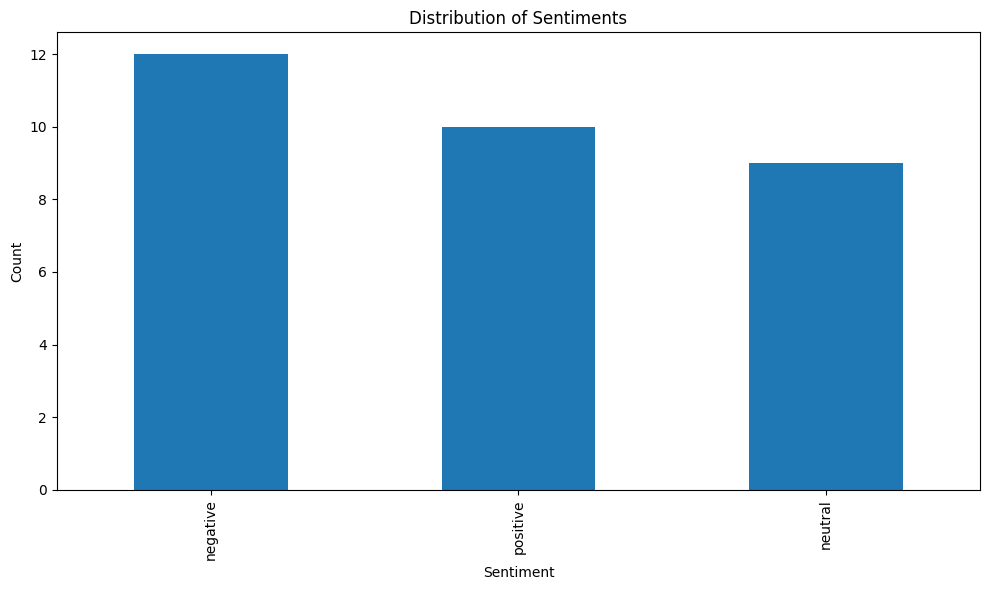

In [12]:
# Import required libraries
from transformers import pipeline
import numpy as np
from scipy.special import softmax

# Create sentiment analyzer
def get_sentiment(text):
    """
    Analyze sentiment of text using CardiffNLP Twitter RoBERTa model.
    Returns: Dictionary with sentiment scores for negative, neutral, and positive
    """
    try:
        # Initialize the model (will download on first run)
        sentiment_task = pipeline(
            "sentiment-analysis",
            model="cardiffnlp/twitter-roberta-base-sentiment-latest",
            tokenizer="cardiffnlp/twitter-roberta-base-sentiment-latest"
        )
        
        # Clean text
        text = str(text)  # Ensure text is string
        text = ' '.join([t if not t.startswith('@') else '@user' for t in text.split()])
        text = ' '.join([t if not t.startswith('http') else 'http' for t in text.split()])
        
        # Get sentiment
        result = sentiment_task(text)[0]  # Truncate to 512 chars to avoid token length issues
        return result
    except Exception as e:
        print(f"Error analyzing sentiment: {e}")
        return {'label': 'ERROR', 'score': 0.0}

# Apply sentiment analysis
print("Analyzing sentiments... this may take a few minutes...")
df['sentiment'] = df['post_content'].apply(get_sentiment)

# Extract sentiment labels and scores
df['sentiment_label'] = df['sentiment'].apply(lambda x: x['label'])
df['sentiment_score'] = df['sentiment'].apply(lambda x: x['score'])

# Print sentiment distribution
print("\nSentiment Distribution:")
print(df['sentiment_label'].value_counts())

# Calculate average sentiment by discussion
print("\nAverage Sentiment Score by Discussion:")
avg_sentiment = df.groupby('post_discussion_title')['sentiment_score'].mean()
print(avg_sentiment)

# Visualize results
plt.figure(figsize=(10, 6))
df['sentiment_label'].value_counts().plot(kind='bar')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [15]:
# Calculate proportions and format as a Series
post_sentiment = df['sentiment_label'].value_counts(normalize=True).round(6)
post_sentiment.name = 'proportion'  # Give it a name to match your desired output
print('post_sentiment')
print(post_sentiment)

post_sentiment
sentiment_label
negative    0.387097
positive    0.322581
neutral     0.290323
Name: proportion, dtype: float64


In [22]:
# Create cross-tabulation using category_id
sentiment_by_category = pd.crosstab(
    index=df['post_category_id'],
    columns=df['sentiment_label'],
    normalize='index'  # This normalizes by row (category)
).round(6)

print("Sentiment Distribution by Category ID:")
print(sentiment_by_category)

# Optional: Let's also see what category IDs we have
print("\nUnique Category IDs:")
print(df['post_category_id'].unique())

Sentiment Distribution by Category ID:
sentiment_label   negative   neutral  positive
post_category_id                              
5                 0.000000  0.307692  0.692308
6                 0.666667  0.277778  0.055556

Unique Category IDs:
[5 6]
